<a href="https://colab.research.google.com/github/Nahid-Ahsan/Bangladesh-s-temperature-changes-data-analysis-and-visualization/blob/master/Bangladesh_Temperature_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [ ]:
from google.colab import files

# Install Kaggle library
!pip install  kaggle

In [ ]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sevgisarac/temperature-change

  0% 0.00/778k [00:00<?, ?B/s]
100% 778k/778k [00:00<00:00, 53.0MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=67cbfab9fd765a8024b7e76427ce11bc866f30c348b80a44f9d958fbcd2525bd
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
!kaggle datasets download -d sevgisarac/temperature-change

temperature-change.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
os.listdir()

['.config',
 'kaggle.json',
 '.ipynb_checkpoints',
 'temperature-change.zip',
 'sample_data']

In [ ]:
!unzip /content/temperature-change.zip

Archive:  /content/temperature-change.zip
  inflating: Environment_Temperature_change_E_All_Data_NOFLAG.csv  
  inflating: FAOSTAT_data_11-24-2020.csv  


In [ ]:
data = pd.read_csv('/content/Environment_Temperature_change_E_All_Data_NOFLAG.csv',encoding='latin-1')
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,-0.157,-0.203,-0.295,0.321,0.220,-0.027,-0.146,-0.004,-0.636,0.132,-0.544,-0.124,-0.537,0.374,-0.441,0.525,0.317,0.575,-0.101,0.673,-0.290,-0.528,-0.502,0.672,0.284,0.012,0.209,0.043,-0.385,-0.388,0.623,0.285,-0.202,0.576,1.285,0.834,0.539,0.831,0.735,0.904,0.748,1.230,0.972,0.909,0.785,1.093,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.37

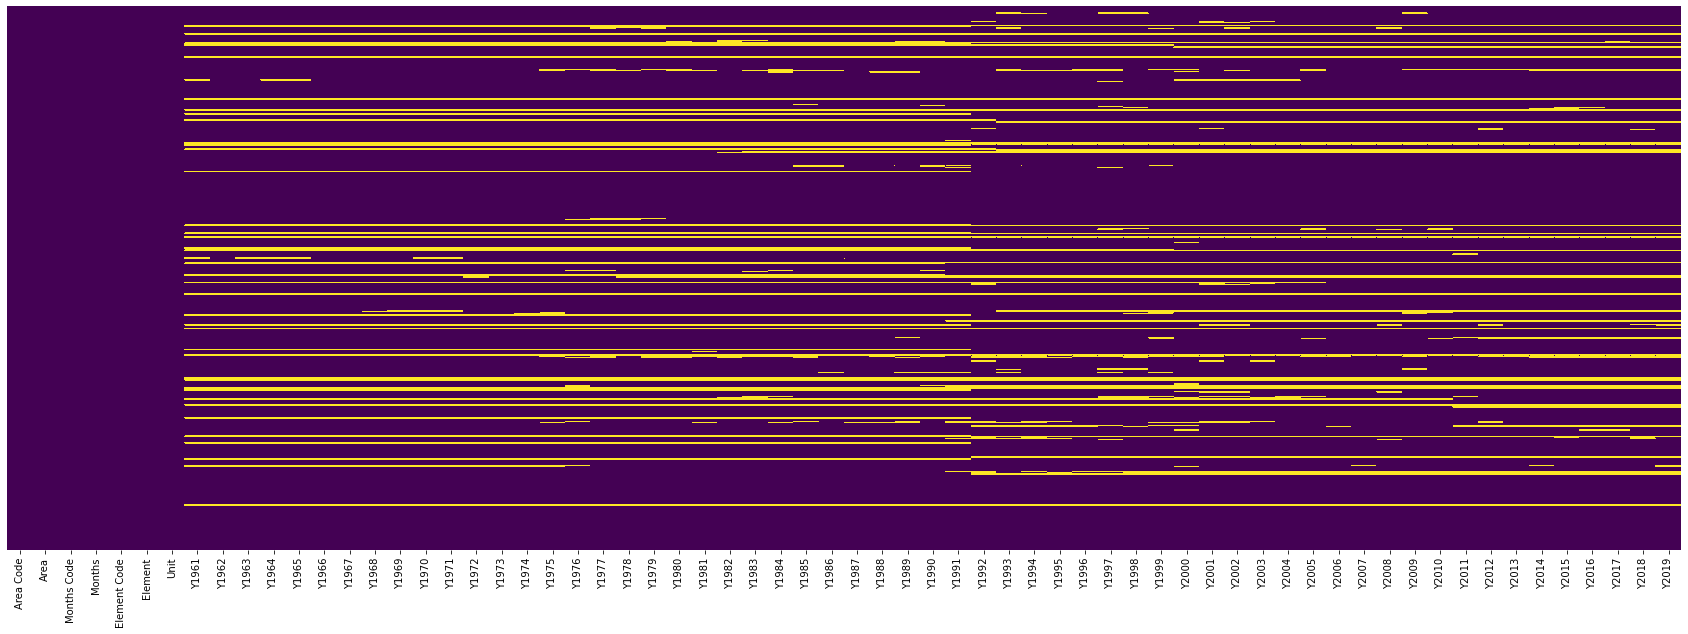

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
data = data.dropna()

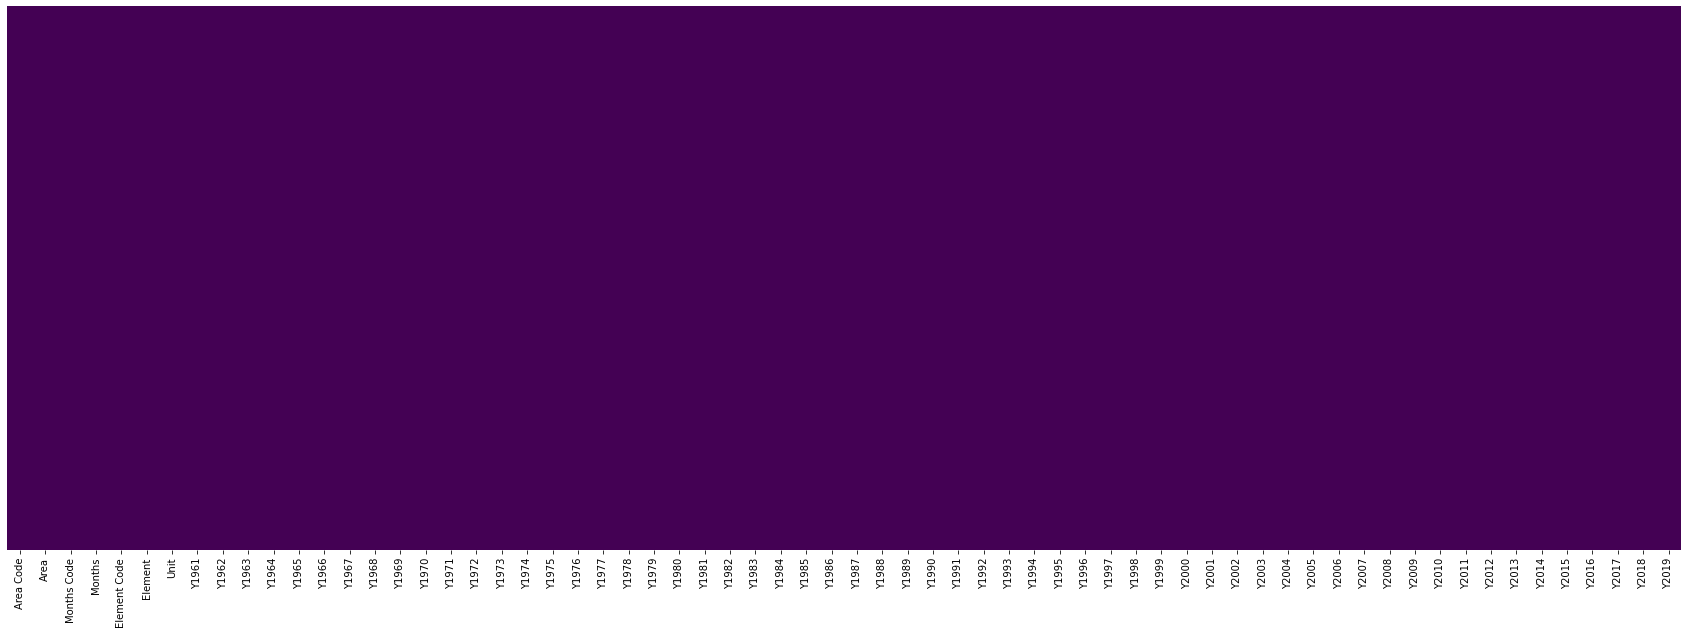

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
data = data.rename(columns={'Area':'Country'})
data = data.drop(columns=['Area Code','Months Code','Element Code', 'Unit'])



In [ ]:
Temp_data = data.loc[data.Months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]

In [ ]:
Temp_data

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,0.804,-1.487,-1.305,-2.951,-1.184,-0.490,2.409,-3.014,-0.663,1.141,-0.393,1.724,0.678,0.524,-0.058,0.435,0.332,2.655,1.150,-1.108,0.634,0.018,0.582,-0.821,1.087,1.297,-0.718,1.426,0.950,0.859,1.565,-0.603,1.606,2.479,2.707,0.109,-1.606,0.431,-5.553,1.518,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,1.809,0.816,-7.722,1.838,-3.706,-1.239,-1.620,-0.156,-0.369,1.072,-1.222,1.088,-2.101,0.460,-4.321,2.467,-0.286,1.409,0.170,-2.890,-0.310,-1.373,-0.120,1.414,-1.412,-0.149,0.870,0.043,-0.540,3.222,-0.901,0.707,0.985,1.816,2.871,-1.506,4.725,1.645,-2.332,2.494,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,-0.915,1.658,-1.784,-0.473,1.001,-0.585,-2.817,3.377,-1.536,-1.420,-0.628,1.166,-1.781,-2.406,1.761,-0.160,-3.087,1.330,-0.056,0.065,-1.000,-0.901,-2.220,-1.449,1.312,-1.451,-0.336,-0.005,-0.576,-0.217,-0.267,1.229,1.949,-0.158,2.753,1.663,1.847,-0.201,4.172,2.362,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,OECD,October,Standard Deviation,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635,0.635
9642,OECD,November,Temperature change,-0.023,0.668,0.429,-0.003,0.111,-0.564,0.273,0.099,0.138,0.031,-0.657,-0.464,-0.459,0.054,-0.204,-0.330,0.371,-0.555,0.835,0.620,1.094,-0.293,0.935,-0.197,-1.322,-0.973,0.801,-0.226,-0.664,0.162,-0.414,-0.199,-0.611,0.644,-0.351,-0.345,0.834,1.270,1.126,0.577,1.164,1.125,0.904,0.894,1.214,0.712,0.760,0.995,2.101,1.088,0.882,0.741,0.326,0.357,2.063,2.353,0.878,0.364,1.030
9643,OECD,November,Standard Deviation,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435,0.435
9644,OECD,December,Temperature change,-0.576,0.258,-0.362,-1.303,0.631,-0.021,0.316,-0.771,1.177,-0.775,-0.529,-0.731,0.19

In [ ]:
Temp_data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of',
       'Cocos (Keeling) Islands', 'Colombia', 'Congo', "Côte d'Ivoire",
       'Cuba', 'Cyprus', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'French Southe

In [ ]:
Temp_BD = Temp_data.loc[Temp_data.Country== 'Bangladesh']
Temp_BD

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
578,Bangladesh,January,Temperature change,0.928,-1.171,-0.318,-0.268,0.396,0.440,0.441,-0.293,-0.520,-0.335,0.095,0.517,0.638,-0.387,-0.145,-0.063,-0.261,-1.136,0.806,0.031,0.146,0.777,-0.425,-0.547,0.591,0.269,0.565,0.825,-1.108,0.693,-0.301,-0.574,-0.934,0.803,-0.958,-0.112,-0.770,-0.565,0.784,0.510,-0.105,0.829,-1.263,-0.042,0.371,0.576,0.301,0.343,1.368,-0.580,-0.772,-0.795,-1.743,0.206,1.462,0.392,1.376,-0.415,1.019
579,Bangladesh,January,Standard Deviation,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590,0.590
580,Bangladesh,February,Temperature change,-1.527,0.024,1.319,0.310,-0.417,1.338,0.601,-0.995,0.137,0.041,-0.654,-2.095,1.214,-0.238,0.082,0.482,-0.099,-0.100,-0.578,-0.131,0.032,-0.161,-0.818,-0.819,-0.229,0.312,0.897,1.002,-0.267,0.505,1.141,-1.165,0.354,-0.744,-0.510,0.181,-1.269,0.476,1.997,-0.822,0.903,1.074,1.109,0.911,1.563,3.877,0.129,-1.136,1.472,0.836,0.563,-0.052,0.475,-0.119,1.088,2.727,1.877,1.827,1.264
581,Bangladesh,February,Standard Deviation,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899,0.899
582,Bangladesh,March,Temperature change,1.024,0.060,-0.066,1.159,-1.184,0.290,-1.120,-0.223,0.441,0.007,-0.603,-0.079,-0.576,-0.361,0.606,0.617,1.264,-1.019,-0.066,0.058,-0.902,-1.090,-0.383,0.032,1.135,0.571,-0.247,0.068,-0.207,-2.014,0.799,0.897,-1.528,-0.071,-0.611,0.915,0.390,-1.139,1.607,-0.566,-0.124,0.775,-0.662,1.284,0.719,1.095,-0.455,0.599,1.053,2.119,0.357,0.911,0.659,0.158,0.608,1.981,-0.318,1.659,0.427
583,Bangladesh,March,Standard Deviation,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705,0.705
584,Bangladesh,April,Temperature change,0.813,0.345,-0.855,-0.567,-0.332,0.708,-1.135,-0.592,-0.019,0.203,-1.625,-0.643,0.965,-0.548,0.452,0.232,-1.583,-0.612,0.234,1.181,-2.141,-0.885,-0.810,0.240,0.503,-0.759,-0.397,0.350,0.312,-1.232,-0.146,0.680,-1.000,-0.668,0.848,0.168,-2.453,-0.162,1.867,-0.243,0.486,-0.590,0.210,-0.667,0.044,-0.060,0.074,0.500,1.419,1.474,-0.229,-0.476,0.187,1.412,-0.925,1.837,-0.009,-0.054,0.422
585,Bangladesh,April,Standard Deviation,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802
586,Bangladesh,May,Temperature change,0.390,-0.233,-1.122,-0.383,0.351,1.072,0.083,-0.118,0.303,0.579,-0.810,0.565,-0.975,-0.526,-0.124,-0.760,-1.676,-0.655,1.512,-0.910,-1.035,1.017,-0.694,-0.563,-0.549,-0.689,0.349,-0.184,0.619,-0.324,-0.709,-0.731,-1.278,0.210,0.796,0.125,-0.018,0.608,-0.021,-0.252,-0.519,-0.473,0.293,1.145,-0.286,0.078,0.650,0.35

In [ ]:
Temp_BD.info

<bound method DataFrame.info of         Country     Months             Element  ...  Y2017  Y2018  Y2019
578  Bangladesh    January  Temperature change  ...  1.376 -0.415  1.019
579  Bangladesh    January  Standard Deviation  ...  0.590  0.590  0.590
580  Bangladesh   February  Temperature change  ...  1.877  1.827  1.264
581  Bangladesh   February  Standard Deviation  ...  0.899  0.899  0.899
582  Bangladesh      March  Temperature change  ... -0.318  1.659  0.427
583  Bangladesh      March  Standard Deviation  ...  0.705  0.705  0.705
584  Bangladesh      April  Temperature change  ... -0.009 -0.054  0.422
585  Bangladesh      April  Standard Deviation  ...  0.802  0.802  0.802
586  Bangladesh        May  Temperature change  ...  1.340 -0.294  1.470
587  Bangladesh        May  Standard Deviation  ...  0.747  0.747  0.747
588  Bangladesh       June  Temperature change  ...  1.404  1.337  1.999
589  Bangladesh       June  Standard Deviation  ...  0.513  0.513  0.513
590  Bangladesh    

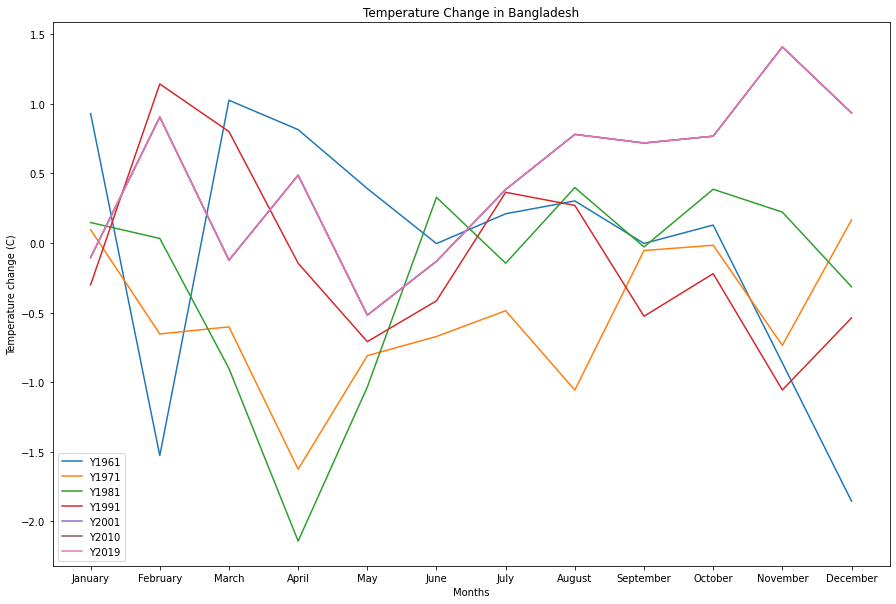

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y1961.loc[Temp_BD.Element=='Temperature change'], label='Y1961')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y1971.loc[Temp_BD.Element=='Temperature change'], label='Y1971')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y1981.loc[Temp_BD.Element=='Temperature change'], label='Y1981')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y1991.loc[Temp_BD.Element=='Temperature change'], label='Y1991')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y2001.loc[Temp_BD.Element=='Temperature change'], label='Y2001')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y2001.loc[Temp_BD.Element=='Temperature change'], label='Y2010')
sns.lineplot(x=Temp_BD.Months.loc[Temp_BD.Element=='Temperature change'],y=Temp_BD.Y2001.loc[Temp_BD.Element=='Temperature change'], label='Y2019')
plt.xlabel('Months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Bangladesh')
plt.show()

In [ ]:
Temp_BD = Temp_BD.melt(id_vars=['Country','Months','Element'],var_name='Year',value_name='Temp_data')
Temp_BD['Year'] = Temp_BD['Year'].str[1:].astype('str')

In [ ]:
Temp_BD

,Country,Months,Element,Year,Temp_data
0,Bangladesh,January,Temperature change,1961,0.928
1,Bangladesh,January,Standard Deviation,1961,0.590
2,Bangladesh,February,Temperature change,1961,-1.527
3,Bangladesh,February,Standard Deviation,1961,0.899
4,Bangladesh,March,Temperature change,1961,1.024
...,...,...,...,...,...
1411,Bangladesh,October,Standard Deviation,2019,0.446
1412,Bangladesh,November,Temperature change,2019,1.909
1413,Bangladesh,November,Standard Deviation,2019,0.764
1414,Bangladesh,December,Temperature change,2019,0.421


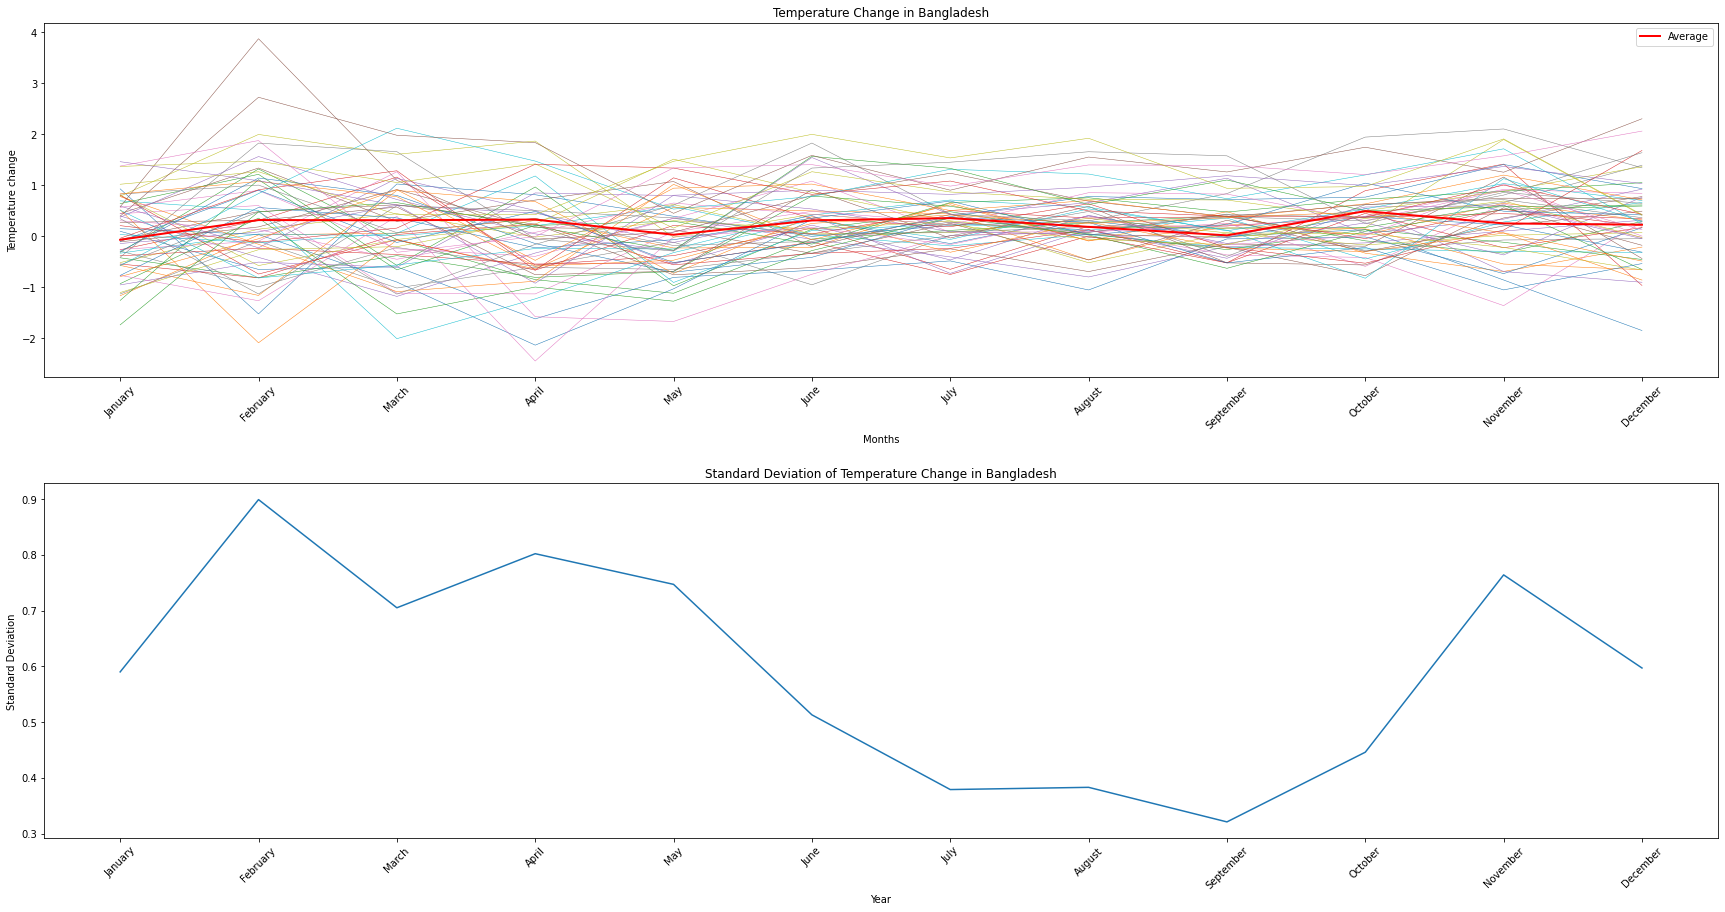

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(211)
for i in Temp_BD.Year.unique():
    plt.plot(Temp_BD.Months.loc[Temp_BD.Year==str(i)].loc[Temp_BD.Element=='Temperature change'],Temp_BD.Temp_data.loc[Temp_BD.Year==str(i)].loc[Temp_BD.Element=='Temperature change'],linewidth=0.5)
plt.plot(Temp_BD.Months.unique(),Temp_BD.loc[Temp_BD.Element=='Temperature change'].groupby(['Months']).mean(),'r',linewidth=2.0,label='Average')
plt.xlabel('Months',)
plt.xticks(rotation=45)
plt.ylabel('Temperature change')
plt.title('Temperature Change in Bangladesh')
plt.legend()

plt.subplot(212)
plt.plot(Temp_BD.Months.loc[Temp_BD.Year=='1961'].loc[Temp_BD.Element=='Standard Deviation'],Temp_BD.Temp_data.loc[Temp_BD.Year=='1961'].loc[Temp_BD.Element=='Standard Deviation']) 
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Temperature Change in Bangladesh')

plt.subplots_adjust(hspace=0.3)
plt.show() 

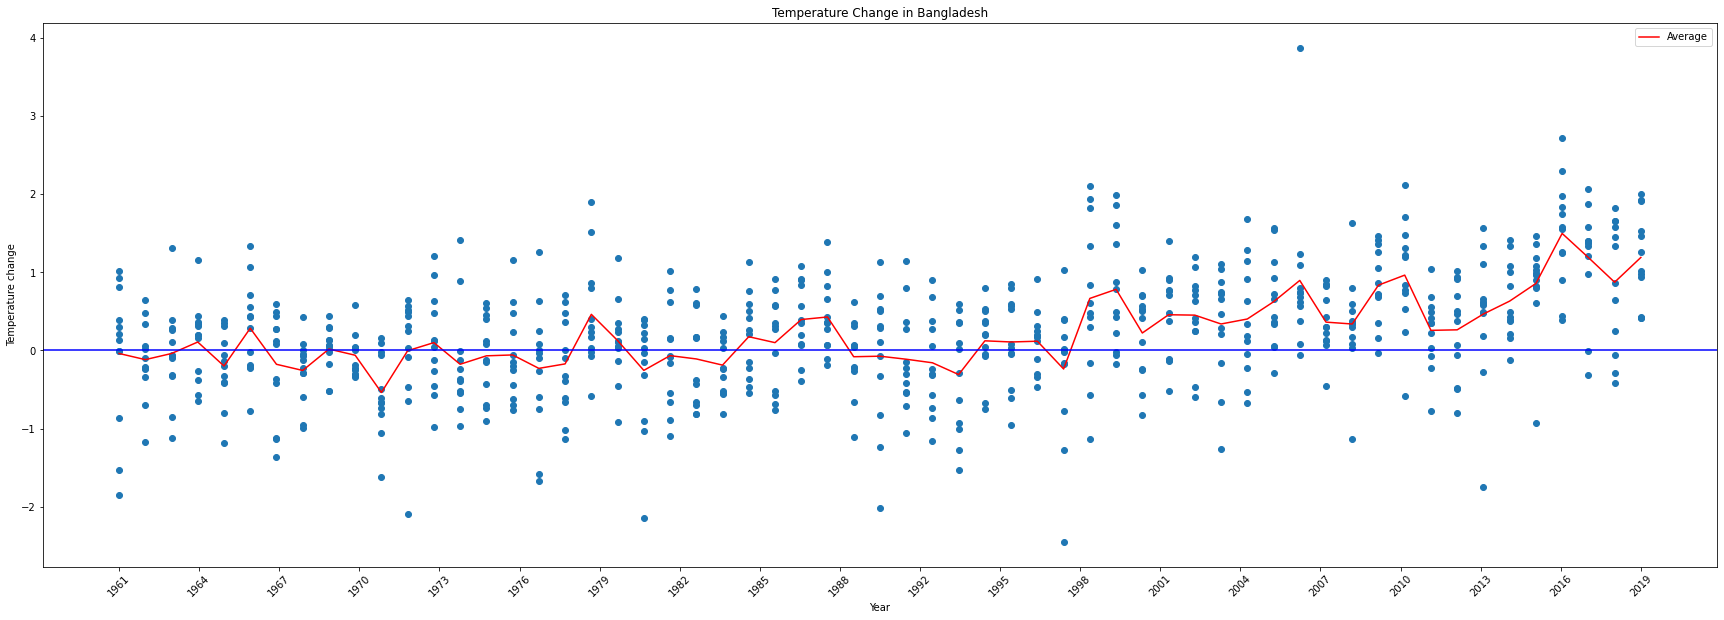

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(Temp_BD['Year'].loc[Temp_BD.Element=='Temperature change'],Temp_BD['Temp_data'].loc[Temp_BD.Element=='Temperature change'])
plt.plot(Temp_BD.loc[Temp_BD.Element=='Temperature change'].groupby(['Year']).mean(),'r',label='Average')
plt.axhline(y=0.0, color='b', linestyle='-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20),rotation=45)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature Change in Bangladesh')
plt.show()

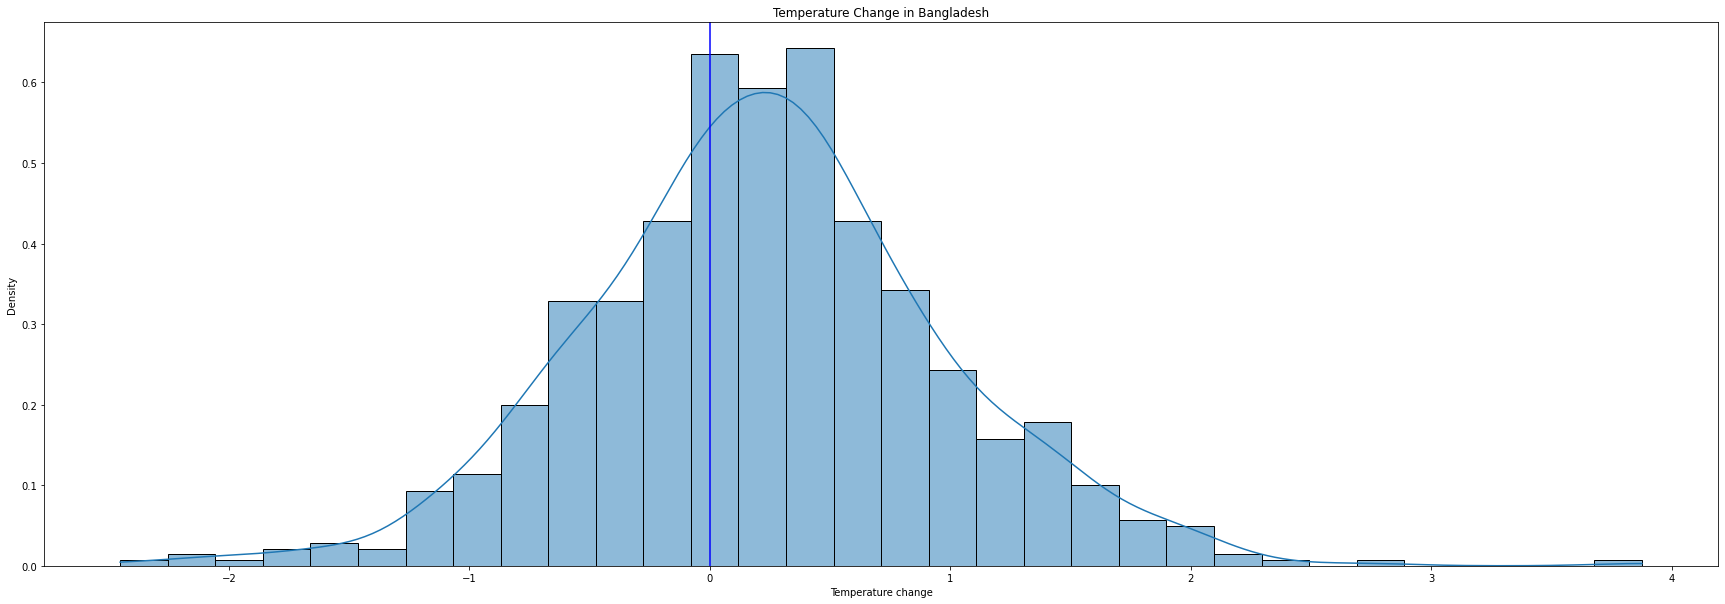

In [ ]:
plt.figure(figsize=(30,10))
sns.histplot(Temp_BD.Temp_data.loc[Temp_BD.Element=='Temperature change'],kde=True,stat='density')
plt.axvline(x=0.0, color='b', linestyle='-')
plt.xlabel('Temperature change')
plt.title('Temperature Change in Bangladesh')
plt.show()

In [ ]:
MonthV={'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
Temp_BD=Temp_BD.replace(MonthV)
Temp_BD

,Country,Months,Element,Year,Temp_data
0,Bangladesh,1,Temperature change,1961,0.928
1,Bangladesh,1,Standard Deviation,1961,0.590
2,Bangladesh,2,Temperature change,1961,-1.527
3,Bangladesh,2,Standard Deviation,1961,0.899
4,Bangladesh,3,Temperature change,1961,1.024
...,...,...,...,...,...
1411,Bangladesh,10,Standard Deviation,2019,0.446
1412,Bangladesh,11,Temperature change,2019,1.909
1413,Bangladesh,11,Standard Deviation,2019,0.764
1414,Bangladesh,12,Temperature change,2019,0.421


In [ ]:
y=Temp_BD['Temp_data'].loc[Temp_BD.Element=='Temperature change']
X=Temp_BD.drop(columns=['Temp_data','Country','Months','Element']).loc[Temp_BD.Element=='Temperature change']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)


In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
preds = LR.predict(X_valid)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))

RMSE: 0.6435630053486725


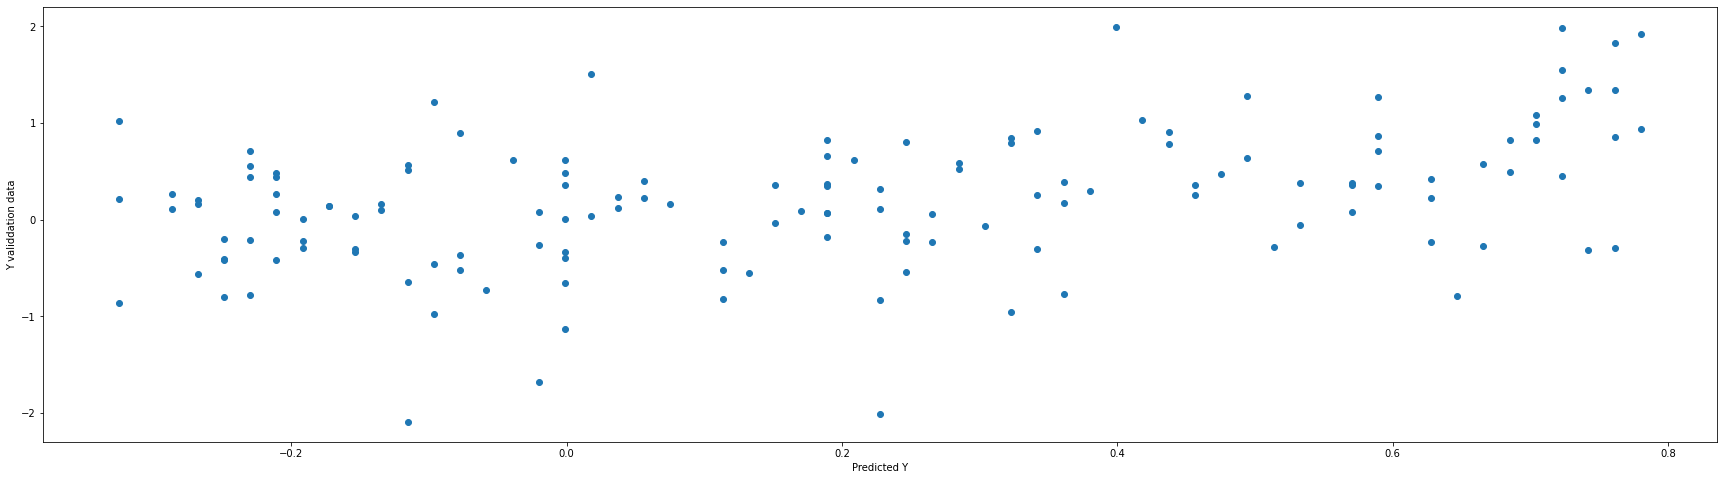

In [ ]:
plt.figure(figsize=(30,8))
plt.scatter(preds,y_valid)
plt.ylabel('Y validdation data')
plt.xlabel('Predicted Y')
plt.show()

In [ ]:
# Fit the model to the training data
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Creating prediction data
T_test=pd.DataFrame({'Year':np.random.randint(2010,2032, size=1000)})
T_test=T_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

#T_test=pd.DataFrame(np.arange(2020, 2046),columns=['Year']).astype(str)


In [ ]:
# Generate test predictions
preds_test = LR.predict(T_test)
T_test['Temp_data']=pd.Series(preds_test, index=T_test.index)
#T_test.head()

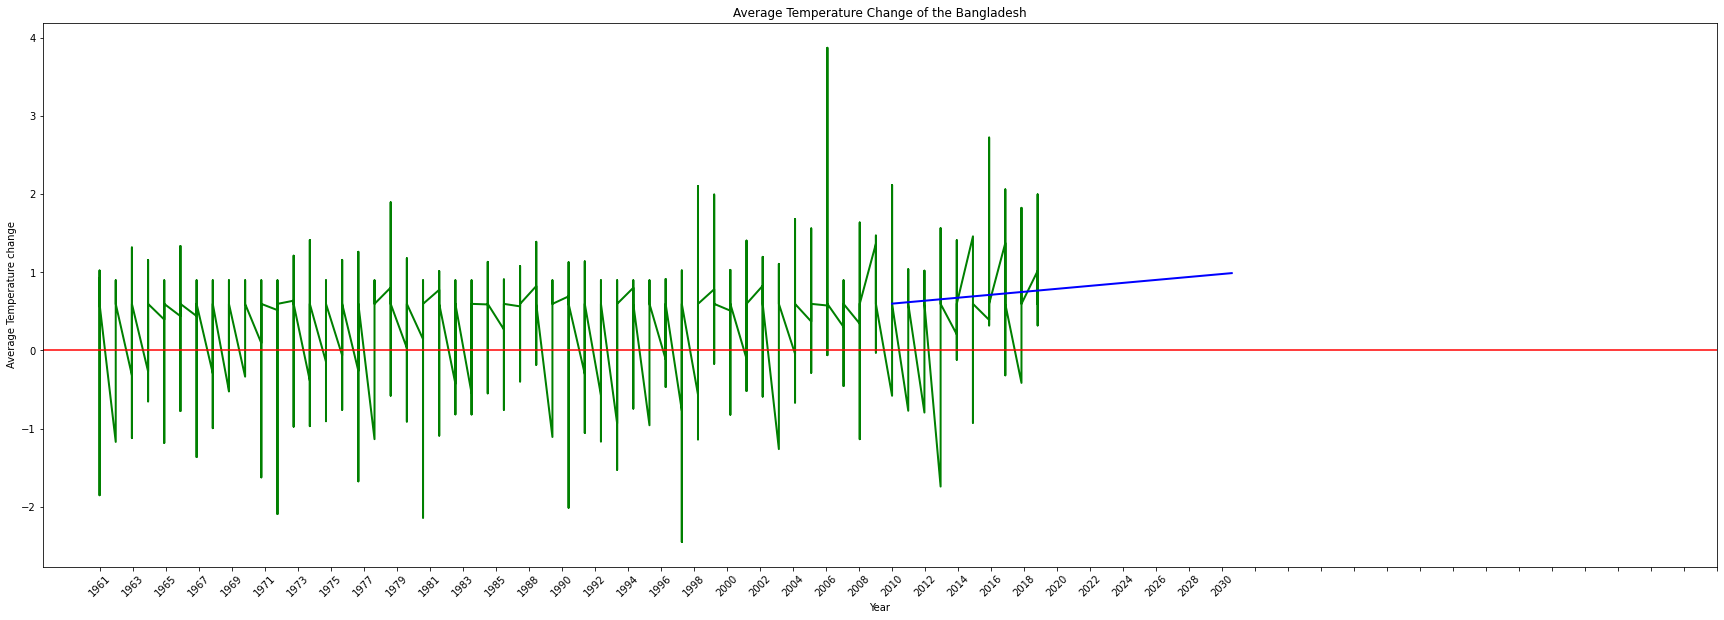

In [ ]:
plt.figure(figsize=(30,10))
for i in Temp_BD.Country.unique():
    plt.plot(Temp_BD.Year.loc[Temp_BD.Country==str(i)],Temp_BD.Temp_data.loc[Temp_BD.Country==str(i)],linewidth=0.5)

plt.plot(Temp_BD.Year,Temp_BD.Temp_data,'g',linewidth=2.0)
plt.plot(T_test.Year.unique(),T_test.groupby('Year').mean(),'b',linewidth=2.0)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xticks(np.linspace(0,100,50),rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Temperature change')
plt.title('Average Temperature Change of the Bangladesh')
plt.show()